In [25]:
import gpflow

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [27]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'C0', lw=2)
    plt.fill_between(xx[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(-0.1, 1.1)


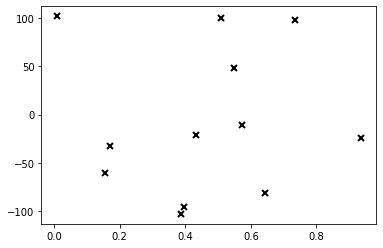

In [28]:
def f(X):
    return 10*np.sin(12*X) + 100*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3

N = 12
X = np.random.rand(N,1)
Y = f(X)
plt.plot(X, Y, 'kx', mew=2)


In [60]:
class BaseSin(gpflow.mean_functions.MeanFunction):
    def __init__(self, b = None):
        """
        A is a matrix which maps each element of X to Y, b is an additive
        constant.

        If X has N rows and D columns, and Y is intended to have Q columns,
        then A must be [D, Q], b must be a vector of length Q.
        """
        gpflow.mean_functions.MeanFunction.__init__(self)
        b = np.zeros(1, dtype=default_float()) if b is None else b
        self.b = gpflow.Parameter(b)


    def __call__(self, X):
        return tf.math.sin(X) + self.b

In [61]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.models.GPR((X.astype('double'), Y.astype('double')), k, BaseSin(3))
m.likelihood.variance.assign(0.01)


<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-4.600266525158521>

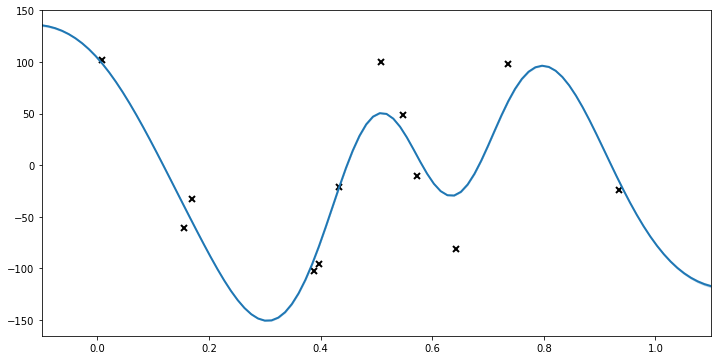

In [62]:
plot(m)

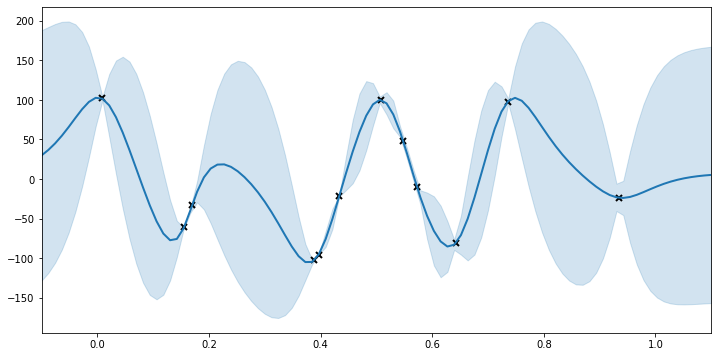

In [65]:
#gpflow.train.ScipyOptimizer().minimize(m)
gpflow.optimizers.Scipy().minimize(
        m.training_loss,
        variables=m.trainable_variables
        )

plot(m)


[0.07630513 0.16200734 0.18243519 0.21908364 0.41946233 0.56406779
 0.64645802 0.70721306 0.71846334 0.84946345 0.86284296 0.99159887]


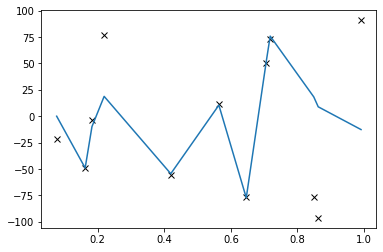

In [64]:
X_test = np.sort(np.random.rand(N,1).reshape(N,))
Y_pred = m.predict_f(X_test.reshape(N, 1))[0]
print()
print(X_test)
plt.plot(X_test, f(X_test.reshape(N, 1)).reshape(N,), 'kx')
plt.plot(X_test, Y_pred)
plt.show()

In [43]:
a = np.array([3, 4, 2, 1])

[1 2 3 4]
